# Fish Weight Prediction (Regression Analysis for beginners) -   Part 2
Build an ML regression model using the Tree based Algorithms (Decision Tree, Random Forest, XGboost)


## Step 1: Collect the data

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np
data = pd.read_csv("Merah.csv")
data.head()

Species  Weight  Length1  Length2  Length3   Height   Width
0     Mas   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Mas   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Mas   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Mas   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Mas   430.0     26.5     29.0     34.0  12.4440  5.1340

## Step 2: Visualize The data

In [9]:
data.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [10]:
data.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

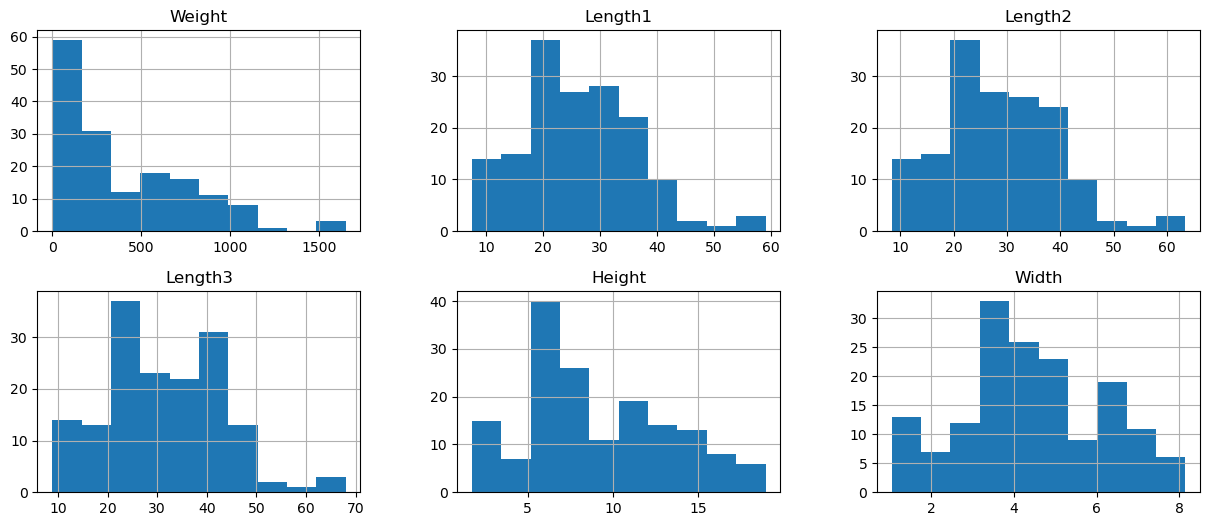

In [11]:
# what is the distribution of the features?
data_num = data.drop(columns=["Species"])

fig, axes = plt.subplots(len(data_num.columns)//3, 3, figsize=(15, 6))
i = 0
for triaxis in axes:
    for axis in triaxis:
        data_num.hist(column = data_num.columns[i], ax=axis)
        i = i+1

c:\Users\Gde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


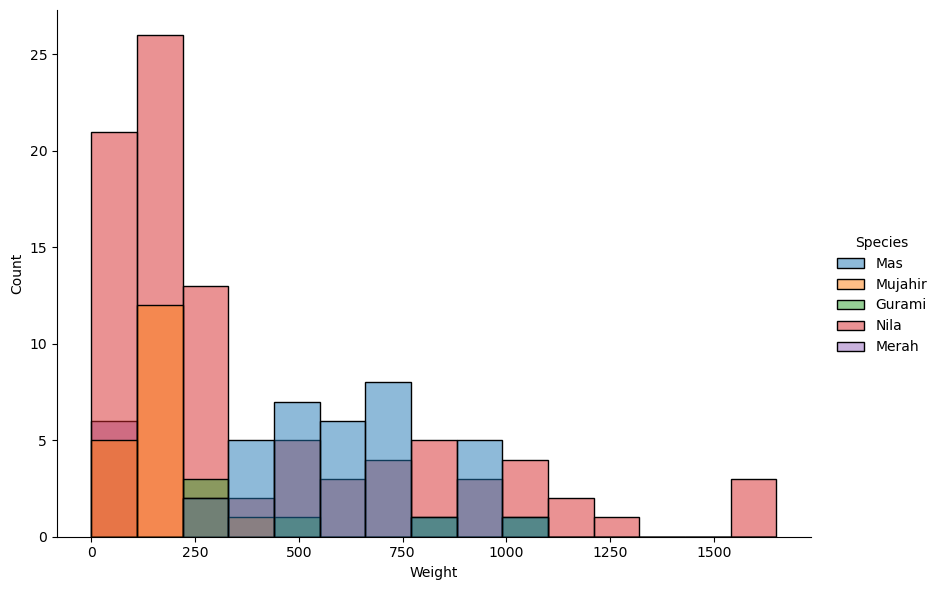

In [12]:
sns.displot(
  data=data,
  x="Weight",
  hue="Species",
  kind="hist",
  height=6,
  aspect=1.4,
  bins=15
)
plt.show()

c:\Users\Gde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Gde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Gde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Gde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

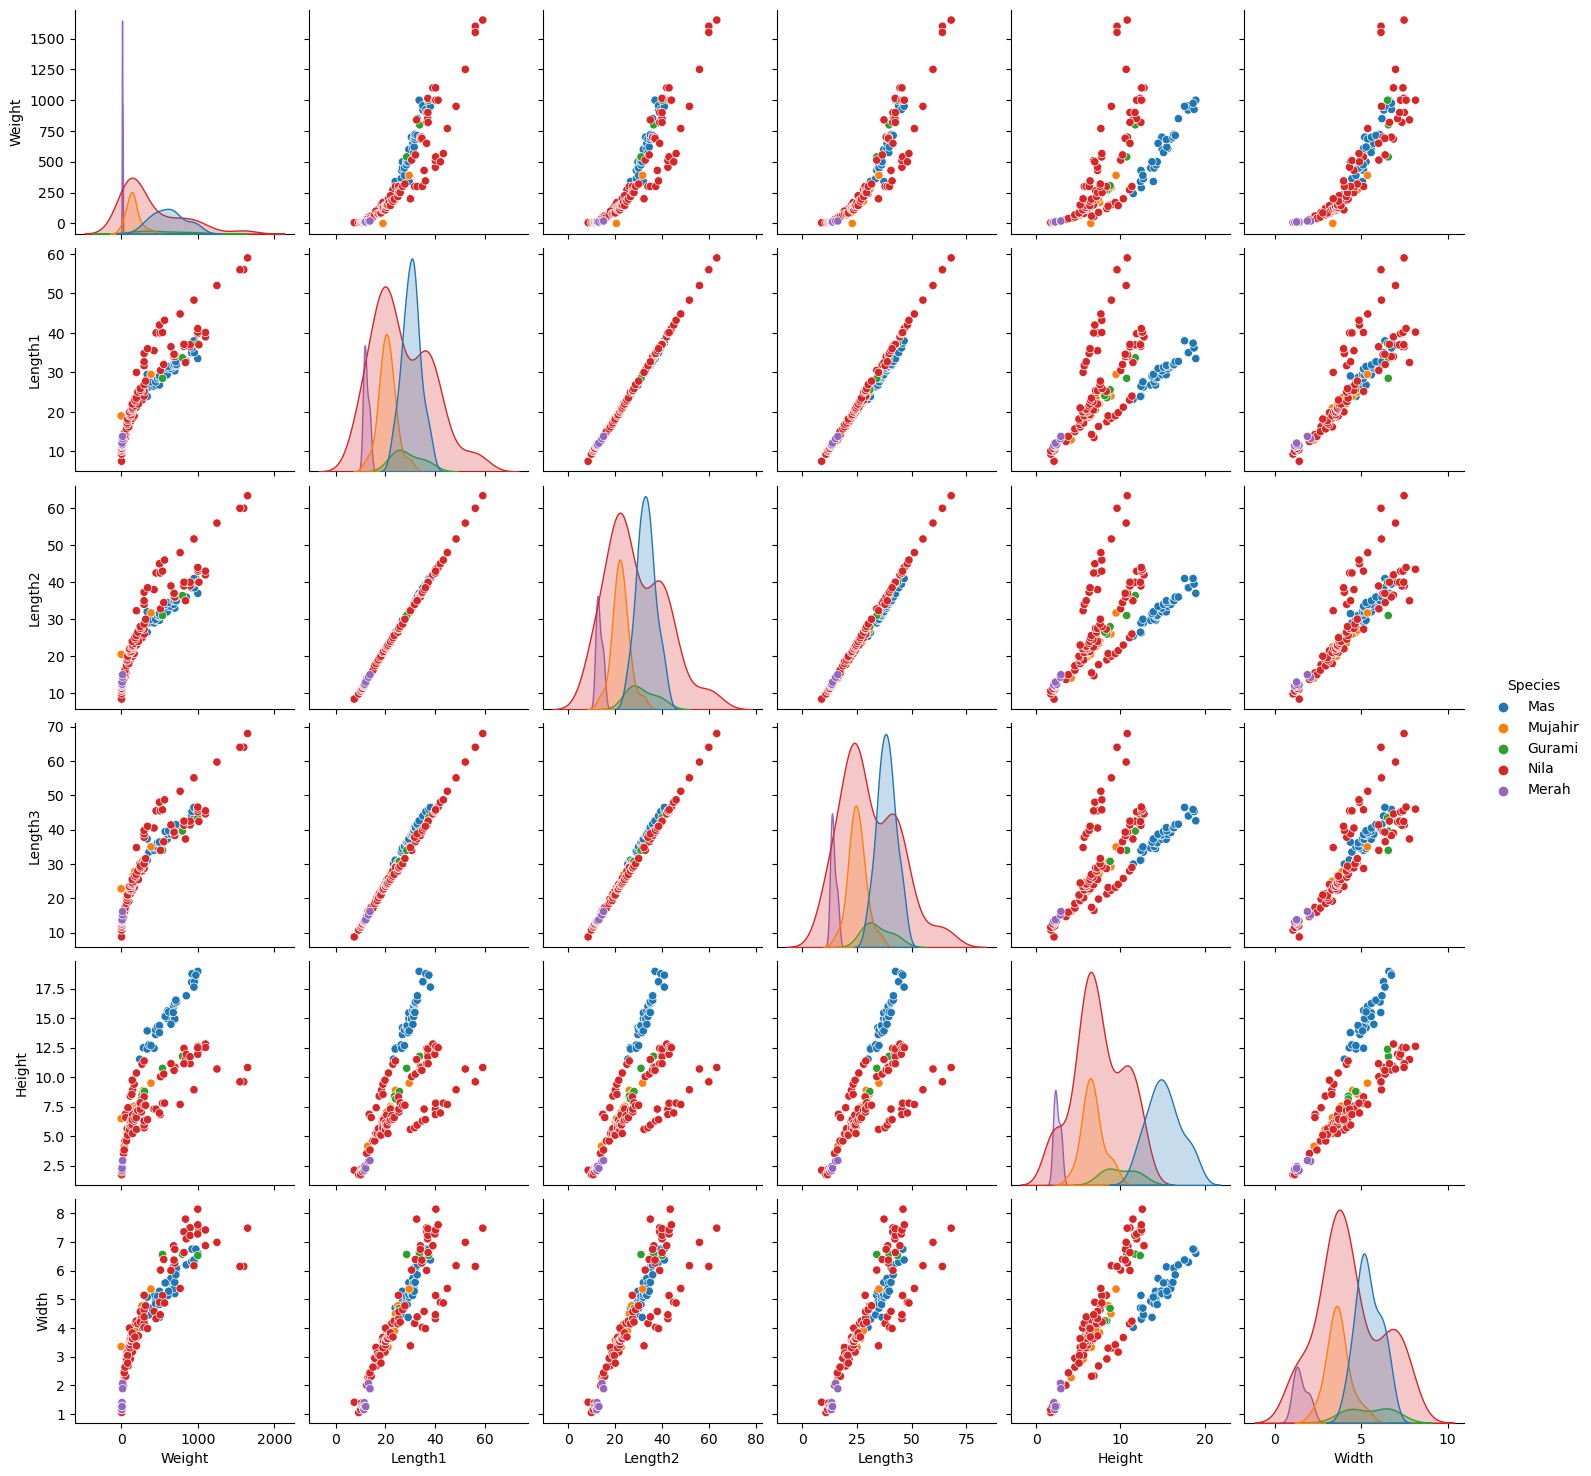

In [13]:
sns.pairplot(data, kind='scatter', hue='Species');

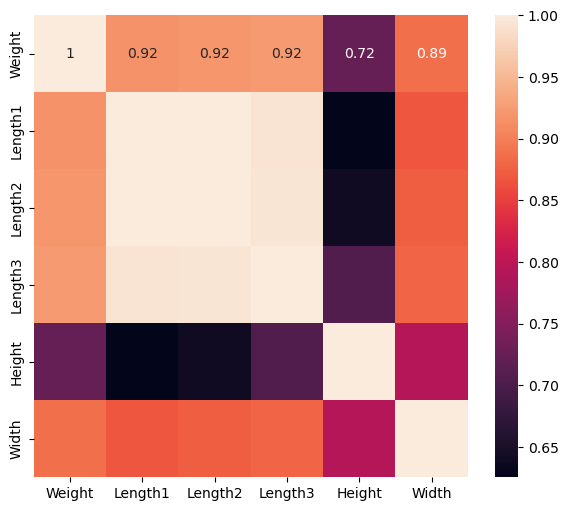

In [14]:
plt.figure(figsize=(7,6))
corr = data_num.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)
plt.show()

In [15]:
data.head()

Species  Weight  Length1  Length2  Length3   Height   Width
0     Mas   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Mas   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Mas   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Mas   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Mas   430.0     26.5     29.0     34.0  12.4440  5.1340

## Step3: Clean the data

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#create X and y values
data_cleaned =   data.drop("Weight", axis=1)
y = data['Weight']

x_train, x_test, y_train, y_test = train_test_split(data_cleaned,y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((127, 6), (32, 6), (127,), (32,))

In [18]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 1.4 MB/s eta 0:01:27
   ---------------------------------------- 0.4/124.9 MB 3.8 MB/s eta 0:00:34
   ---------------------------------------- 0.4/124.9 MB 3.8 MB/s eta 0:00:34
   ---------------------------------------- 1.1/124.9 MB 5.3 MB/s eta 0:00:24
   ---------------------------------------- 1.3/124.9 MB 5.3 MB/s eta 0:00:24
    --------------------------------------- 1.7/124.9 MB 5.6 MB/s eta 0:00:22
    --------------------------------------- 2.2/124.9 MB 6.4 MB/s eta 0:00:20
    --------------------------------------- 2.6/124.9 MB 6.5 MB/s eta 0:00:19
    --------------------------------------- 2.9/124.9 MB 6.7 MB/s eta 0:00:19
   - -------------------------------------- 3.3/124.9 MB 6.7 MB/s eta 0:00:19
   - -------------------------------------- 3.6/124.9 MB 6.8 MB/s eta 0:00:18


In [20]:
x_train.head()

Species  Length1  Length2  Length3   Height   Width
75      Nila     15.0     16.2     17.2   4.5924  2.6316
138     Nila     43.2     46.0     48.7   7.7920  4.8700
2        Mas     23.9     26.5     31.1  12.3778  4.6961
86      Nila     20.0     22.0     23.5   6.1100  3.4075
45   Mujahir     20.5     22.5     25.3   7.0334  3.8203

In [21]:
# label encoder
label_encoder = LabelEncoder()
x_train['Species'] = label_encoder.fit_transform(x_train['Species'].values)
x_test['Species'] = label_encoder.transform(x_test['Species'].values)

In [22]:
x_train.head()

Species  Length1  Length2  Length3   Height   Width
75         4     15.0     16.2     17.2   4.5924  2.6316
138        4     43.2     46.0     48.7   7.7920  4.8700
2          1     23.9     26.5     31.1  12.3778  4.6961
86         4     20.0     22.0     23.5   6.1100  3.4075
45         3     20.5     22.5     25.3   7.0334  3.8203

## Step 4 Train the model

In [23]:
def evauation_model(pred, y_val):
  score_MSE = round(mean_squared_error(pred, y_val),2)
  score_MAE = round(mean_absolute_error(pred, y_val),2)
  score_r2score = round(r2_score(pred, y_val),2)
  return score_MSE, score_MAE, score_r2score

In [24]:
def models_score(model_name, train_data, y_train, val_data,y_val):
    model_list = ["Decision_Tree","Random_Forest","XGboost_Regressor"]
    #model_1
    if model_name=="Decision_Tree":
        reg = DecisionTreeRegressor(random_state=42)
    #model_2
    elif model_name=="Random_Forest":
      reg = RandomForestRegressor(random_state=42)
        
    #model_3
    elif model_name=="XGboost_Regressor":
        reg = xgb.XGBRegressor(objective="reg:squarederror",random_state=42,)
    else:
        print("please enter correct regressor name")
        
    if model_name in model_list:
        reg.fit(train_data,y_train)
        pred = reg.predict(val_data)
     
        score_MSE, score_MAE, score_r2score = evauation_model(pred,y_val)
        return round(score_MSE,2), round(score_MAE,2), round(score_r2score,2)

In [25]:
model_list = ["Decision_Tree","Random_Forest","XGboost_Regressor"]
result_scores = []
for model in model_list:
    score = models_score(model, x_train, y_train, x_test, y_test)
    result_scores.append((model, score[0], score[1],score[2]))
    print(model,score)

Decision_Tree (6496.39, 48.4, 0.95)
Random_Forest (4017.98, 42.84, 0.97)
XGboost_Regressor (5701.45, 43.76, 0.95)


## Step5: Evaluate

In [26]:
df_result_scores = pd.DataFrame(result_scores,columns=["model","mse","mae","r2score"])
df_result_scores

model      mse    mae  r2score
0      Decision_Tree  6496.39  48.40     0.95
1      Random_Forest  4017.98  42.84     0.97
2  XGboost_Regressor  5701.45  43.76     0.95

In [28]:
!pip install hyperopt

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
    --------------------------------------- 0.0/1.6 MB 640.0 kB/s eta 0:00:03
   ------ --------------------------------- 0.3/1.6 MB 3.1 MB/s eta 0:00:01
   -------------- ------------------------- 0.6/1.6 MB 4.5 MB/s eta 0:00:01
   ------------------- -------------------- 0.8/1.6 MB 4.5 MB/s eta 0:00:01
   --------------------------------- ------ 1.3/1.6 MB 6.0 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 6.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/200.5 kB ? eta -:--:--
   --------------------------------------- 200.5/200.5 kB 12.7 MB/s eta 0:00:00


## Step6: Parameter Tuning


In [29]:
from hyperopt import hp
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials
from sklearn.model_selection import cross_val_score

In [30]:
num_estimator = [100,150,200,250]

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 30,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': hp.choice("n_estimators", num_estimator),
    }

def hyperparameter_tuning(space):
    model=xgb.XGBRegressor(n_estimators = space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                         reg_alpha = int(space['reg_alpha']) , min_child_weight=space['min_child_weight'],
                         colsample_bytree=space['colsample_bytree'], objective="reg:squarederror")
    
    score_cv = cross_val_score(model, x_train, y_train, cv=5, scoring="neg_mean_absolute_error").mean()
    return {'loss':-score_cv, 'status': STATUS_OK, 'model': model}


trials = Trials()
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=200,
            trials=trials)

print(best)

100%|██████████| 200/200 [00:36<00:00,  5.44trial/s, best loss: 37.84492673562856] 
{'colsample_bytree': 0.745834829144021, 'gamma': 6.596237008238698, 'max_depth': 3.0, 'min_child_weight': 1.0, 'n_estimators': 2, 'reg_alpha': 63.0, 'reg_lambda': 0.4510548395548094}


In [31]:
# example of trials result
trials.results[0:2]

[{'loss': 41.788530026362494,
  'status': 'ok',
  'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.7576693255090405, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=7.9822167440864815,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=3, max_leaves=None,
               min_child_weight=0.0, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=200, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...)},
 {'loss': 58.05827916964017,
  'status': 'ok',
  'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
               c

In [32]:
best['max_depth'] = int(best['max_depth']) # convert to int
best["n_estimators"] = num_estimator[best["n_estimators"]] # assing n_estimator because it returs the index

In [33]:
reg = xgb.XGBRegressor(**best)
reg.fit(x_train,y_train)
pred = reg.predict(x_test)
score_MSE, score_MAE, score_r2score = evauation_model(pred,y_test) 
to_append = ["XGboost_hyper_tuned",score_MSE, score_MAE, score_r2score]
df_result_scores.loc[len(df_result_scores)] = to_append
df_result_scores

model      mse    mae  r2score
0        Decision_Tree  6496.39  48.40     0.95
1        Random_Forest  4017.98  42.84     0.97
2    XGboost_Regressor  5701.45  43.76     0.95
3  XGboost_hyper_tuned  4550.16  47.54     0.96

## Step7-8: choose best model and make prediction

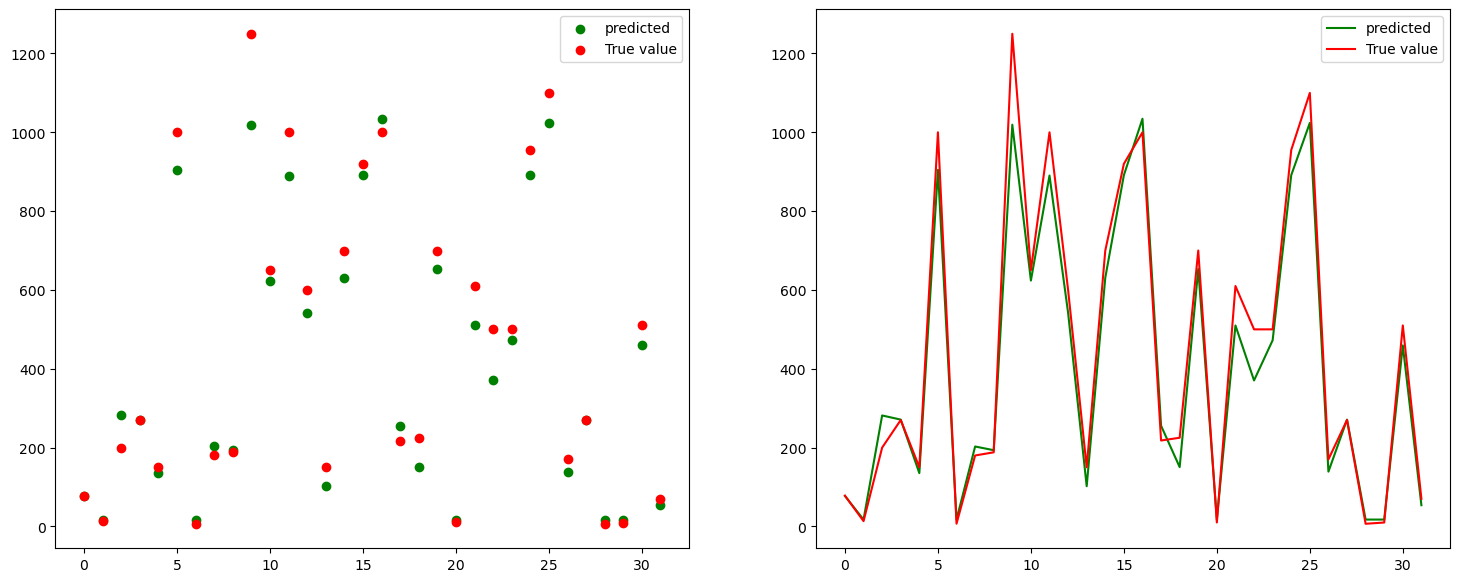

In [34]:
# winner
reg = xgb.XGBRegressor(**best)
reg.fit(x_train,y_train)
pred = reg.predict(x_test)
plt.figure(figsize=(18,7))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(range(0,len(x_test)), pred,color="green",label="predicted")
plt.scatter(range(0,len(x_test)), y_test,color="red",label="True value")
plt.legend()

plt.subplot(1, 2, 2) # index 2
plt.plot(range(0,len(x_test)), pred,color="green",label="predicted")
plt.plot(range(0,len(x_test)), y_test,color="red",label="True value")
plt.legend()
plt.show()